In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
# Filter all FutureWarnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", module="matplotlib")


# Data Reading and Cleaning

In [ ]:
dataset = pd.read_csv("/content/train.csv")
dataset_test = pd.read_csv("/content/test.csv")

In [ ]:
dataset.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


**Dataset parameters:**


FAVC	- Consume high-calorie foods frequently

FCVC	- Number of meals where you usually eat vegetables

NCP -	Number of main meals a day

CAEC	- Eat food between meals

SMOKE	- How often you smoke

CH2O	- Liters of water you drink a day

SCC	- Self-Care Commitment

FAF	- Frequency of days per week that you often have physical activity

TUE	- Time of use of technological devices on a daily basis

CALC	- Frequency of alcohol intake.

MTRANS	- Means of transportation that you use regularly



In [ ]:
dataset.shape

(20758, 18)

# null values we have in dataset and dataset_test.

---





In [ ]:
dataset_nans = dataset.isnull().sum().to_frame().T
dataset_nans['DataFrame'] = 'dataset'

dataset_test_nans = dataset_test.isnull().sum().to_frame().T
dataset_test_nans['DataFrame'] = 'dataset_test'

combined_df = pd.concat([dataset_nans, dataset_test_nans], axis=0, ignore_index=True)
combined_df

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,DataFrame
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,dataset
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,dataset_test


In [ ]:
#Set id to index
dataset.set_index('id',inplace=True)

dataset_test.set_index('id',inplace=True)

dataset.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
id,,,,,,,,,,,,,,,,,
0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


# columns and their data type for both datasets.







In [ ]:
dataset_nans = dataset.dtypes.to_frame().T
dataset_nans['DataFrame'] = 'dataset'

dataset_test_nans = dataset_test.dtypes.to_frame().T
dataset_test_nans['DataFrame'] = 'dataset_test'

combined_df = pd.concat([dataset_nans, dataset_test_nans], axis=0, ignore_index=True)
combined_df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,DataFrame
0,object,float64,float64,float64,object,object,float64,float64,object,object,float64,object,float64,float64,object,object,object,dataset
1,object,float64,float64,float64,object,object,float64,float64,object,object,float64,object,float64,float64,object,object,NaN,dataset_test


The dtype of each feature matches across both datasets. We will now see if each feature in dataset has the same number of unique values in dataset_test.
This is important as if we have any object features that have more unique values in dataset_test than dataset then we will need to accomodate for this in order to build a machine learning model that can handle dataset_test for the submission.

In [ ]:
#Let's see what the unique values are for all object columns.
#We know from the data description in the competition that NObeyesdad will have at least 3 values
dataset_features_unique_vals_dict = {}
dataset_test_features_unique_vals_dict = {}
for data in [dataset,dataset_test]:
    for col in data.columns:
        if dataset[col].dtype == 'O':
            if 'NObeyesdad' in data.columns.tolist():
                dataset_features_unique_vals_dict[col] = data[col].nunique()
            else:
                dataset_test_features_unique_vals_dict[col] = data[col].nunique()
dataset_features_unique_vals_dict['DataFrame'] = 'dataset'
dataset_test_features_unique_vals_dict['DataFrame'] = 'dataset_test'
combined_df = pd.DataFrame([dataset_features_unique_vals_dict, dataset_test_features_unique_vals_dict])
combined_df

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad,DataFrame
0,2,2,2,4,2,2,3,5,7.0,dataset
1,2,2,2,4,2,2,4,5,NaN,dataset_test


We see we have an issue. The feature CALC has 3 unique values in dataset and one more in our dataset_test.
Let's see which value dataset is missing.

In [ ]:
print(f"Dataset's unique values in feature CALC: {dataset.CALC.unique().tolist()}".replace("[","").replace("]",""))
print(f"Dataset_test's unique values in feature CALC: {dataset_test.CALC.unique().tolist()}".replace("[","").replace("]",""))

Dataset's unique values in feature CALC: 'Sometimes', 'no', 'Frequently'
Dataset_test's unique values in feature CALC: 'Sometimes', 'no', 'Frequently', 'Always'


To address this we will add a column to the training dataset called CALC_Always and assign it to only have values of 0. This will represent that in the training dataset there were no records where CALC had the value of 'Always'.

In [ ]:
dataset['CALC_Always'] = 0

Moving on, we are dealing with a multi-classification problem - specifically 7 classes. Because the number of unique values is not high, let's have a look at each column's unique values.

In [ ]:
#Each object column's unique values
for col in dataset.columns:
    if dataset[col].dtype == 'O':
        print(f"{col}'s values: {dataset[col].unique().tolist()}".replace("[","").replace("]",""))

Gender's values: 'Male', 'Female'
family_history_with_overweight's values: 'yes', 'no'
FAVC's values: 'yes', 'no'
CAEC's values: 'Sometimes', 'Frequently', 'no', 'Always'
SMOKE's values: 'no', 'yes'
SCC's values: 'no', 'yes'
CALC's values: 'Sometimes', 'no', 'Frequently'
MTRANS's values: 'Public_Transportation', 'Automobile', 'Walking', 'Motorbike', 'Bike'
NObeyesdad's values: 'Overweight_Level_II', 'Normal_Weight', 'Insufficient_Weight', 'Obesity_Type_III', 'Obesity_Type_II', 'Overweight_Level_I', 'Obesity_Type_I'


From our findings above we have the following types of independent features:
Categorical: Gender, family_history, FAVC, CAEC, SMOKE, SCC, CALC, and MTRANS
Numerical: Age, Height, Weight, FCVC, NCP, CH20, FAF, and TUE
We will now move onto some EDA.

# Exploratory Data Analysis (EDA)

In [ ]:
#import libraries
import matplotlib.pyplot as plt
import seaborn as sns

Let's look at a histogram for each numerical feature.

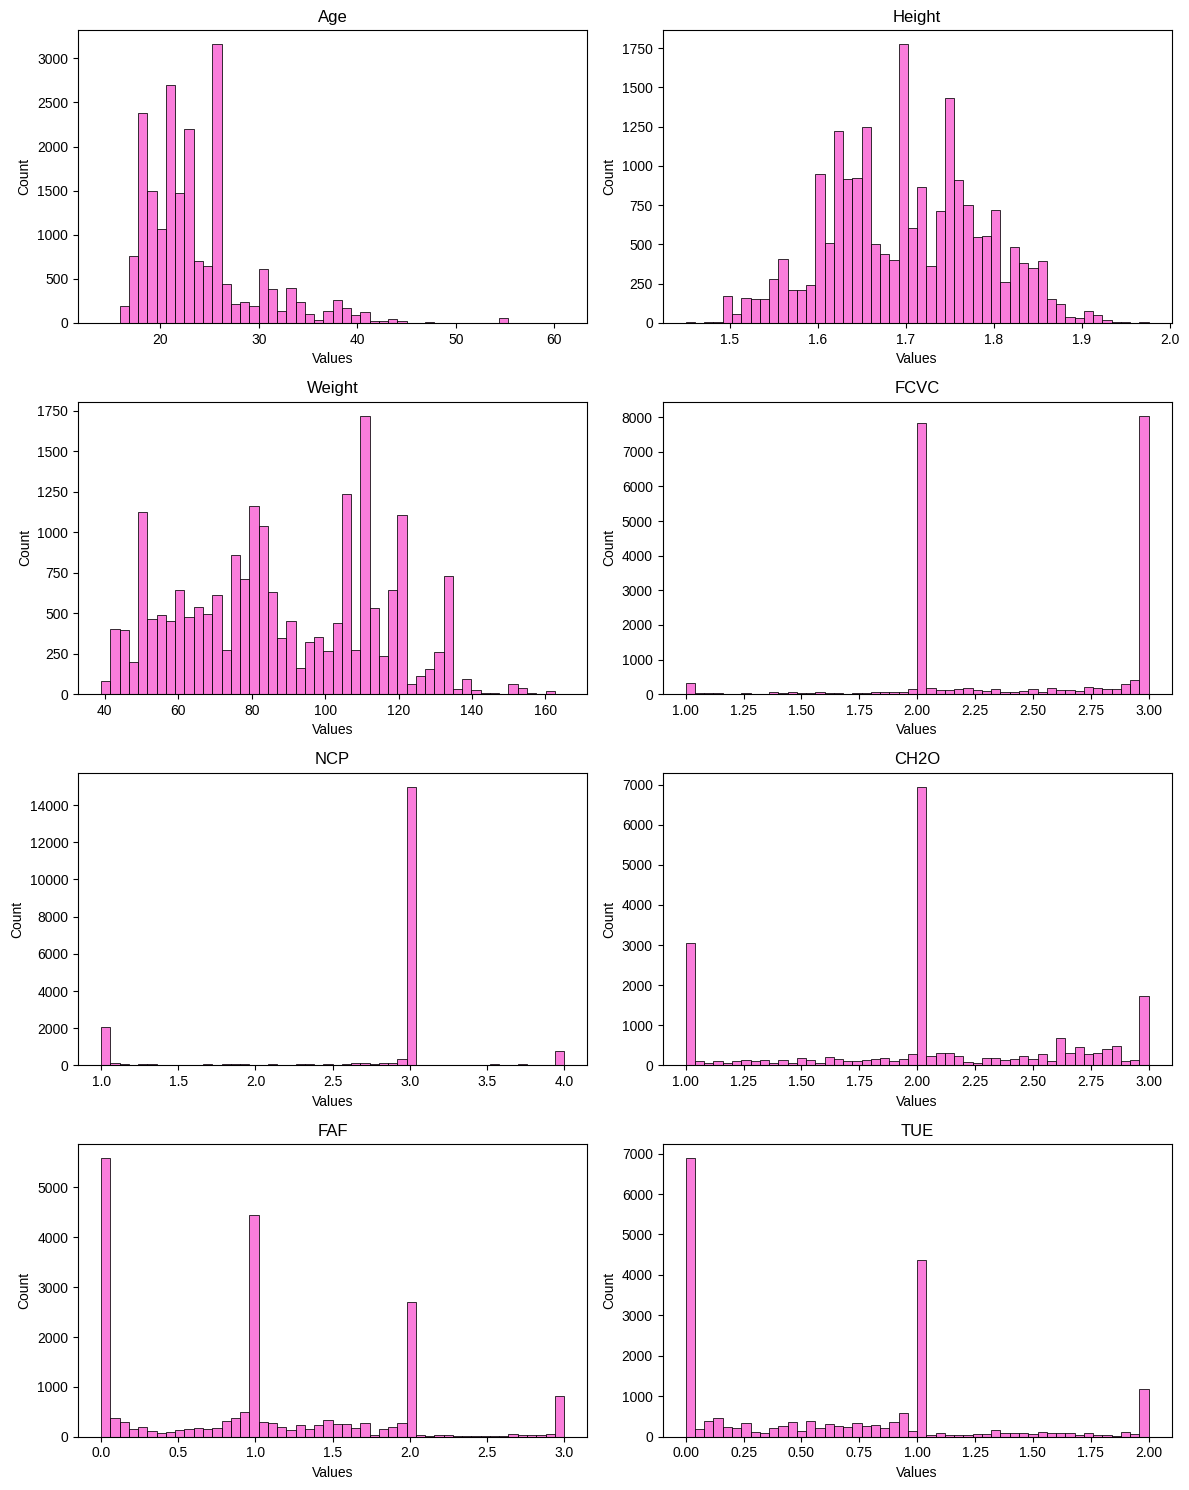

In [ ]:
numeric_features = dataset.select_dtypes(include=['float64'])
#Plotting the histograms
fig, axs = plt.subplots(nrows=4,ncols=2, figsize=(12, 15))
plt.style.use('seaborn-v0_8-whitegrid')
#Flatten the 2D array of axes for easy indexing
axs = axs.flatten()

for i, feature in enumerate(numeric_features):
    sns.histplot(data=dataset, x=feature, ax=axs[i], color='#f951d0', bins=50)
    axs[i].set_xlabel('Values')
    axs[i].set_title(feature)

plt.tight_layout()
plt.show()

We notice that Age is skewed to the right - we will later perform a transformation to make the distribution more normal.
Height has a fairly normal distribution, while Weight is slightly skewed to the left for most of the values but it does contain a big spike near the right side of the median. We will also perform a transformation on this feature.
All the other numerical features are spread out with the occasional big spike. We do however see that FAF and TUE follow a similar trajectory.


We can deduce that the feature CH2O is the daily consumption of water per person in litres. Let's find out more about this feature in our dataset.

Analysis of feature CH2O
count    20758.000000
mean         2.029418
std          0.608467
min          1.000000
25%          1.792022
50%          2.000000
75%          2.549617
max          3.000000
Name: CH2O, dtype: float64


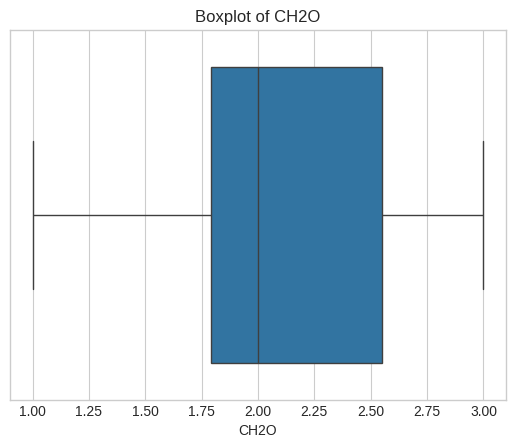

In [ ]:
print("Analysis of feature CH2O")
print(dataset['CH2O'].describe())
sns.boxplot(data=dataset,x='CH2O')
plt.title('Boxplot of CH2O')
plt.show()

Let's see the distributions of our independent categorical features.

<ipython-input-15-84bb36e0b0b3>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(labels=axs[i].get_xticklabels(), rotation=45)
<ipython-input-15-84bb36e0b0b3>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(labels=axs[i].get_xticklabels(), rotation=45)
<ipython-input-15-84bb36e0b0b3>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(labels=axs[i].get_xticklabels(), rotation=45)
<ipython-input-15-84bb36e0b0b3>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(labels=axs[i].get_xticklabels(), rotation=45)
<ipython-input-15-84bb36e0b0b3>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(labels=axs[i].get_xticklabels(), rotation=45)
<ipython-input-15-84bb36e0b0b3>:10: UserWarning: FixedFormatter should only be used togeth

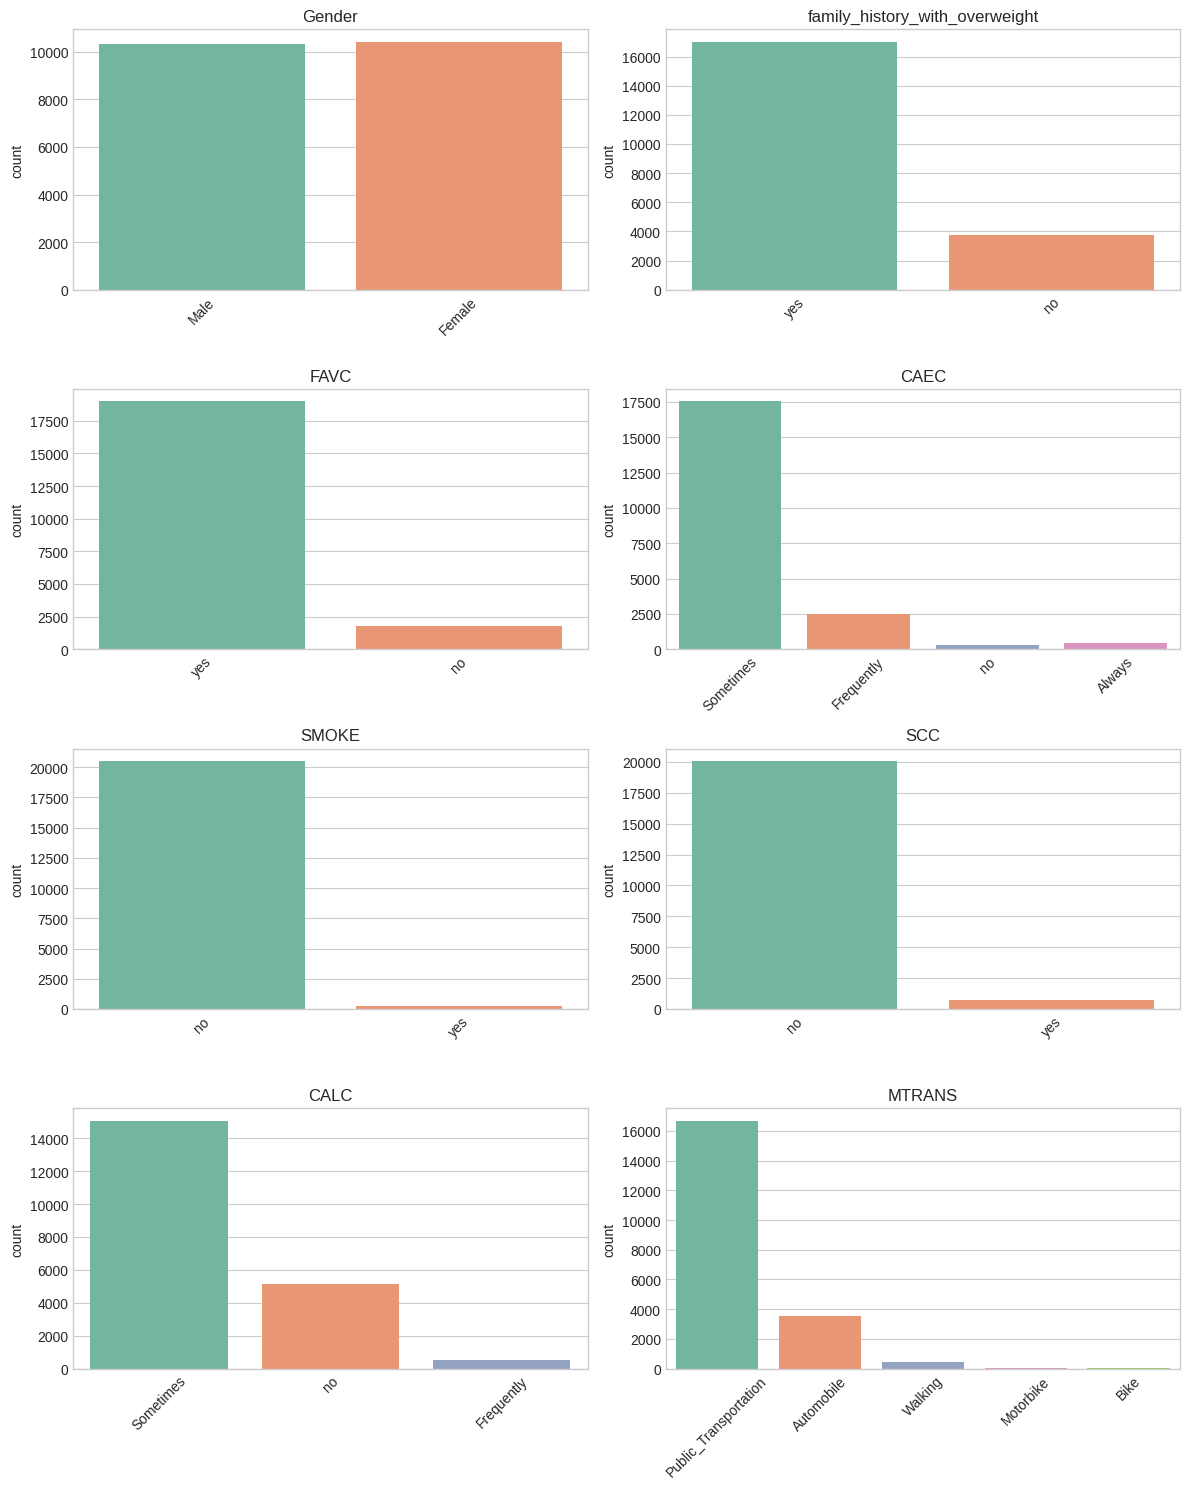

In [ ]:
categorical_features = dataset.select_dtypes(include=['O']).columns.tolist()
categorical_features.remove('NObeyesdad')
#Plotting the pie plots
fig, axs = plt.subplots(nrows=4,ncols=2, figsize=(12, 15))
#Flatten the 2D array of axes for easy indexing
axs = axs.flatten()

for i, feature in enumerate(categorical_features):
    sns.countplot(data=dataset,x=feature,ax=axs[i],palette='Set2')
    axs[i].set_xticklabels(labels=axs[i].get_xticklabels(), rotation=45)
    axs[i].set_xlabel('')
    axs[i].set_title(feature)

plt.tight_layout()
plt.show()

We notice a big disparity in terms of the number of people who smoke and who do not. The same goes for the feature SCC (Self-Care Commitment).
Because the large majority of people take the public transport as their mode of transportation we will now look further into the MTRANS feature by seeing the distribution of the weight classification.

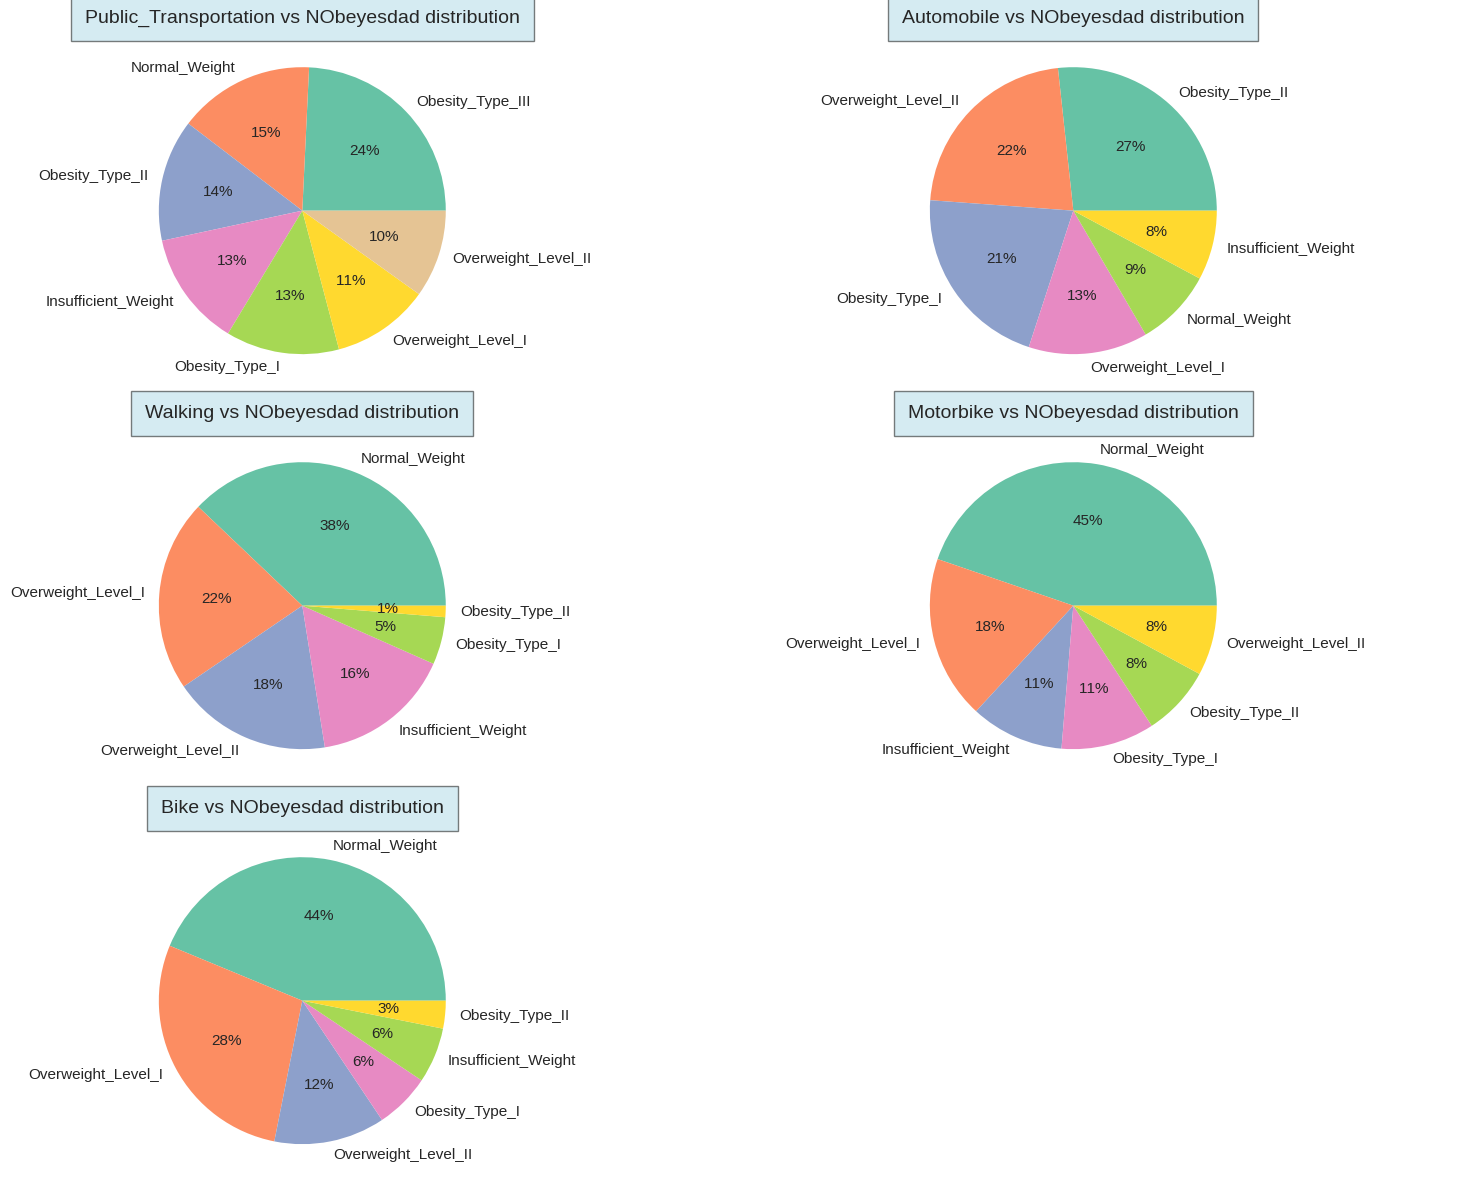

In [ ]:
public_trans = dataset[dataset.MTRANS == 'Public_Transportation'].NObeyesdad.value_counts()

automobile_trans = dataset[dataset.MTRANS == 'Automobile'].NObeyesdad.value_counts()

walking_trans = dataset[dataset.MTRANS == 'Walking'].NObeyesdad.value_counts()

motorbike_trans = dataset[dataset.MTRANS == 'Motorbike'].NObeyesdad.value_counts()

bike_trans = dataset[dataset.MTRANS == 'Bike'].NObeyesdad.value_counts()

#Create subplots
fig, axs = plt.subplots(3, 2, figsize=(16, 12))
axs = axs.flatten() #flatten the 2D array of axes for easy indexing

features = [public_trans, automobile_trans, walking_trans, motorbike_trans, bike_trans]
feature_values = ['Public_Transportation','Automobile','Walking','Motorbike','Bike']

for i, feature in enumerate(features):
    axs[i].pie(x=feature.values, labels=feature.index, colors=sns.color_palette('Set2'), autopct='%.0f%%', textprops={'fontsize': 11})
    axs[i].set_title(f'{feature_values[i]} vs NObeyesdad distribution', fontsize=14, bbox={'facecolor': 'lightblue', 'alpha': 0.5, 'pad': 10})

axs[-1].axis('off') #Set the last subplot to be blank
plt.tight_layout()
plt.show()

While public transportion is fairly evenly distributed, which would indicate that it could not be of great use for prediction, and it comprises of about 80% of the feature, the other modes of transportation are not evenly distributed at all and therefore we will be keeping MTRANS as the nuances between the modes of transport may give good insight for our model.

We will now determine whether SCC brings in enough insight by seeing its distribution against our target variable.

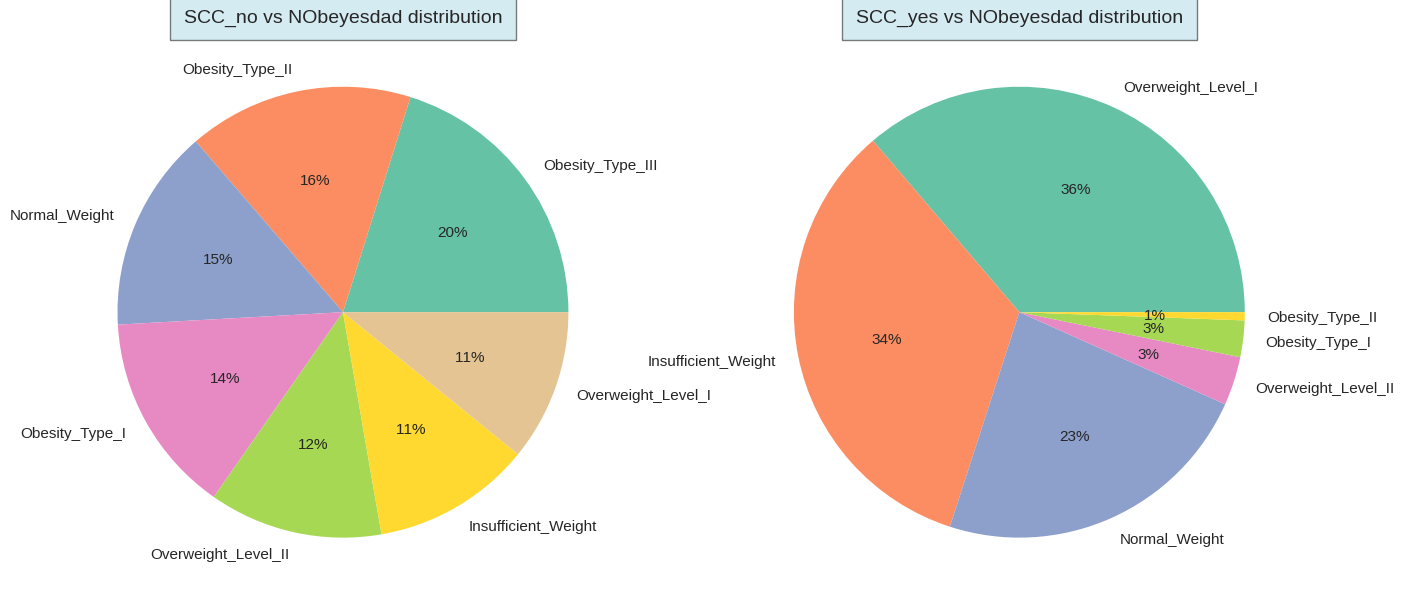

In [ ]:

SCC_no = dataset[dataset.SCC == 'no']['NObeyesdad'].value_counts()
SCC_yes = dataset[dataset.SCC == 'yes']['NObeyesdad'].value_counts()
feature_values = ['SCC_no','SCC_yes']
#Create subplots
fig, axs = plt.subplots(1,2,figsize=(16, 12))
axs = axs.flatten()
for i, feature in enumerate([SCC_no,SCC_yes]):
    axs[i].pie(x=feature.values, labels=feature.index, colors=sns.color_palette('Set2'), autopct='%.0f%%', textprops={'fontsize': 11})
    axs[i].set_title(f'{feature_values[i]} vs NObeyesdad distribution', fontsize=14, bbox={'facecolor': 'lightblue', 'alpha': 0.5, 'pad': 10})

We can infer from these results that the feature SCC will not be of much use to us as a feature on its own considering that SCC_yes only contributes about 3% of the data, and SCC_no is quite evenly distributed.

Let's now see the distribution of our target feature NObeyesdad.

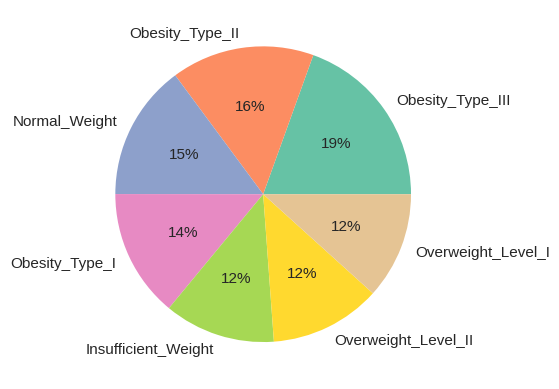

In [ ]:
temp_series = dataset['NObeyesdad'].value_counts()
plt.pie(x=temp_series, labels=temp_series.index, colors=sns.color_palette('Set2'), autopct='%.0f%%', textprops={'fontsize': 11});

We notice a relatively balanced distribution across all classes, with Obesity_Type_III being the highest (19%). This is good as there will not likely be a bias towards any class during model training for prediction.

# Feature Engineering and Data Preparation

As we know if one treats their body well, i.e. does self-care, then their gains from physical activities will increase. For this reason, if SCC is a yes, then we will increase that person's FAF score by 10%.

In [ ]:
dataset['FAF'] = dataset.apply(lambda row: row['FAF']*1.1 if row['SCC']=='yes' else row['FAF'],axis=1)

Conversely, if a person smokes then their gains from physical activities will decrease. Therefore, if a person smokes we will decrease their FAF score by 5%.

In [ ]:
dataset['FAF'] = dataset.apply(lambda row: row['FAF']*0.95 if row['SMOKE']=='yes' else row['FAF'],axis=1)

We will now perform multiple transformations on the Age feature to see which is the best one, but first let's see the skewness value of Age.

In [ ]:
dataset.Age.skew()


1.5862517094133515

This value aligns with our visualisation from before were we noticed that Age is skewed to the right.
[link text](https://www.geeksforgeeks.org/box-cox-transformation-using-python/)

In [ ]:
#Transformations on Age
#BoxCox transformation on Age
from scipy.stats import boxcox, yeojohnson

dataset['Age_BoxCox'], boxcox_lambda_value_Age = boxcox(dataset['Age'])

#YeoJohnson transformation on Age
dataset['Age_YJ'], yj_lambda_value_Age = yeojohnson(dataset['Age'])

#Log transformation on Age
dataset['Age_Log'] = np.log(dataset['Age'])

#Recipricol transformation on Age
dataset['Age_Recip'] = (1/dataset['Age'])

Let's view the distrubitions of Age for each transformation.

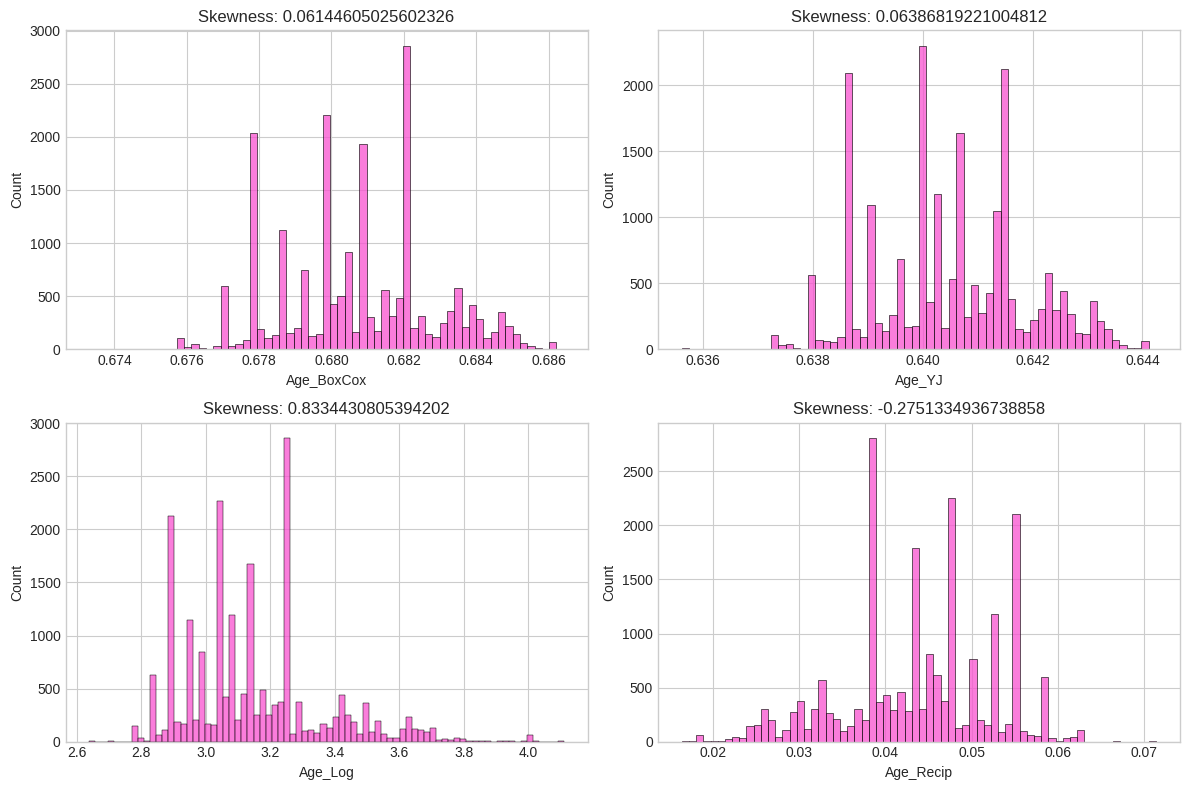

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
plt.style.use('seaborn-v0_8-whitegrid')
#Flatten the 2D array of axes for easy indexing
axs = axs.flatten()
transformation_features = ['Age_BoxCox','Age_YJ','Age_Log','Age_Recip']

for i, feature in enumerate(transformation_features):
    sns.histplot(data=dataset,x=feature,ax=axs[i],color='#f951d0')
    axs[i].set_xlabel(feature)
    axs[i].set_title(f'Skewness: {dataset[feature].skew()}')

plt.tight_layout()
plt.show()

We see BoxCox and YeoJohnson transformations performed best in terms of getting a normal distribution. Since the BoxCox transformation has the best skewness value (although very close to YeoJohnson) we will later replace Age with BoxCox(Age) as we will need the original Age for our BMI related features we will create. For now, we will drop all other created Age features.

In [ ]:
dataset['Age'] = dataset['Age_BoxCox']
dataset.drop(transformation_features,axis=1,inplace=True)
dataset.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,CALC_Always
id,,,,,,,,,,,,,,,,,,
0,Male,0.681558,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II,0
1,Female,0.677854,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight,0
2,Female,0.677854,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight,0
3,Female,0.679898,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III,0
4,Male,0.683627,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II,0


We will now do the same with the feature Weight.

Skewness of Weight before transformation: 0.09318727954173465



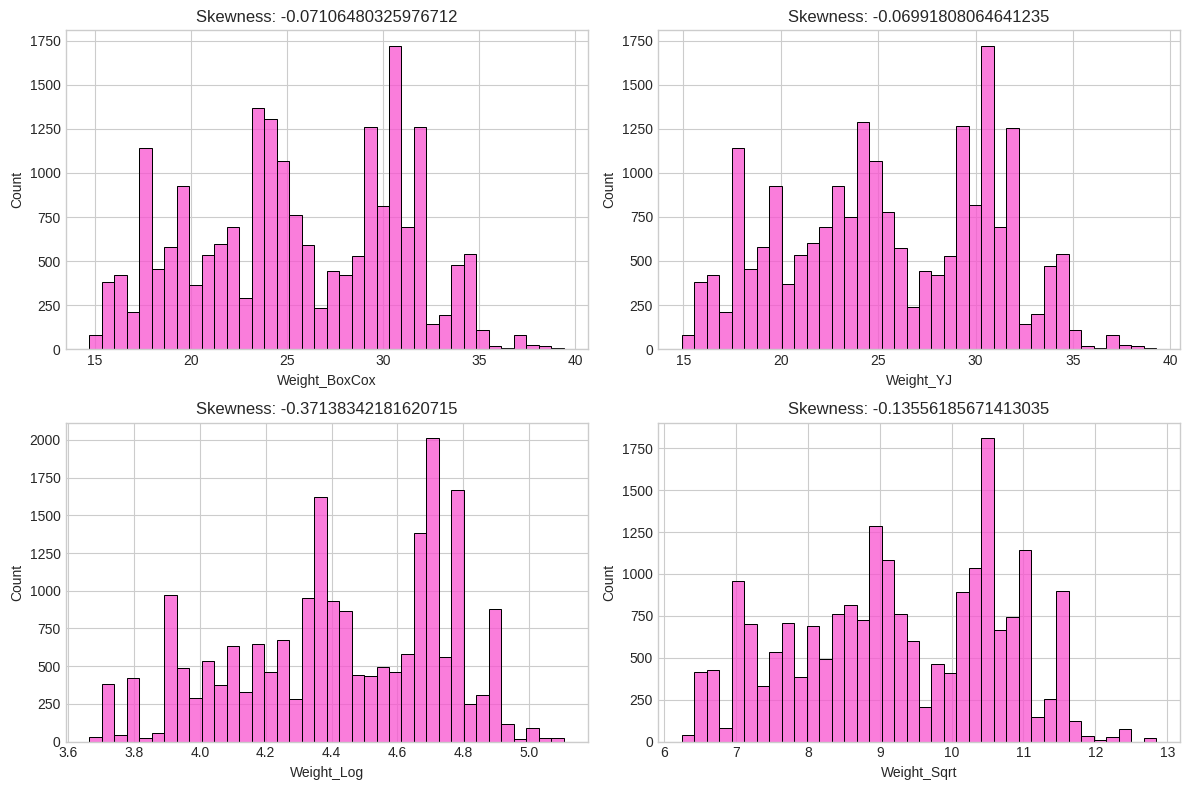

In [ ]:
#Weight skewness beform transformations
print(f"Skewness of Weight before transformation: {dataset.Weight.skew()}\n")
#Transformations on Weight
#BoxCox transformation on Weight
dataset['Weight_BoxCox'], boxcox_lambda_value_Weight = boxcox(dataset['Weight'])
#YeoJohnson transformation on Weight
dataset['Weight_YJ'], yj_lambda_value_Weight = yeojohnson(dataset['Weight'])
#Log transformation on Weight
dataset['Weight_Log'] = np.log(dataset['Weight'])
#Square-root transformation on Weight
dataset['Weight_Sqrt'] = np.sqrt(dataset['Weight'])

#Plotting histograms
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
plt.style.use('seaborn-v0_8-whitegrid')
axs = axs.flatten()
transformation_features = ['Weight_BoxCox','Weight_YJ','Weight_Log','Weight_Sqrt']

for i, feature in enumerate(transformation_features):
    sns.histplot(data=dataset,x=feature,ax=axs[i],color='#f951d0')
    axs[i].set_xlabel(feature)
    axs[i].set_title(f'Skewness: {dataset[feature].skew()}')

plt.tight_layout()
plt.show()


We see BoxCox and YeoJohnson transformations yet again performed best in terms of getting a normal distribution. Since the YeoJohnson transformation has the best skewness value (although very close to BoxCox) we will replace Weight with YeoJohnson(Age) and drop all other created Weight features. While the skewness value has not increased dramatically after the YJ transformation we do visually see that there is less of an issue with the spikes as opposed to before. This is good.

In [ ]:
dataset['Weight'] = dataset['Weight_YJ']
dataset.drop(transformation_features,axis=1,inplace=True)
dataset.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,CALC_Always
id,,,,,,,,,,,,,,,,,,
0,Male,0.681558,1.699998,24.613858,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II,0
1,Female,0.677854,1.560000,19.317919,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight,0
2,Female,0.677854,1.711460,17.713213,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight,0
3,Female,0.679898,1.710730,33.763605,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III,0
4,Male,0.683627,1.914186,27.001972,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II,0


We will now create a feature called PhysicalActivityBenefit = FAF - TUE, i.e. Physical activity frequency - Time using technological devices. The reason why we are subtracting TUE from FAF is because when a person spends a lot of their time on technological devices it can lead to them not obtaining the optimal benefits from their physical activities, e.g. staying up late on one's phone and not getting adequate sleep.

In [ ]:
dataset['PhysicalActivityBenefit'] = dataset.FAF - dataset.TUE


We will also create the feature BMI (body mass index) as this has been a longstanding universal metric for weight classification.

In [ ]:
dataset['BMI'] = dataset.Weight/(dataset.Height**2)


Due to the previously mentioned disparity of the SMOKE feature, and issue with feature SCC we will drop them from our dataset.

In [ ]:
dataset.drop(['SMOKE','SCC'],axis=1, inplace=True)

Let's now change columns to be of correct dtype

In [ ]:
#For all categorical features that have two unique values we will encode the feature to be of type int
#we will also encode our target column to be of type int
#keep in mind that our submission requires the prediction to be in original form (before encoding)
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
encoded_data = dataset.NObeyesdad.values
for colName in dataset.select_dtypes(include=['O']).columns.tolist():
    if dataset[colName].nunique() == 2 or colName == 'NObeyesdad':
        dataset[colName] = label_encoder.fit_transform(dataset[colName])
        if colName == 'NObeyesdad':
            #Create a mapping dictionary to use later for decoding
            label_mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
    else:
        dataset[colName] = dataset[colName].astype('category')

dataset.dtypes

Gender                               int64
Age                                float64
Height                             float64
Weight                             float64
family_history_with_overweight       int64
FAVC                                 int64
FCVC                               float64
NCP                                float64
CAEC                              category
CH2O                               float64
FAF                                float64
TUE                                float64
CALC                              category
MTRANS                            category
NObeyesdad                           int64
CALC_Always                          int64
PhysicalActivityBenefit            float64
BMI                                float64
dtype: object

In [ ]:
#We now need to standardise the numeric features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
numeric_features = numeric_features.columns.tolist()
numeric_features.extend(['PhysicalActivityBenefit','BMI'])
dataset[numeric_features] = sc.fit_transform(dataset[numeric_features])
dataset.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,CH2O,FAF,TUE,CALC,MTRANS,NObeyesdad,CALC_Always,PhysicalActivityBenefit,BMI
id,,,,,,,,,,,,,,,,,,
0,1,0.392392,-0.002828,-0.180944,1,1,-0.836279,0.314684,Sometimes,1.206594,-1.169070,0.597438,Sometimes,Public_Transportation,6,0,-1.311579,-0.190265
1,0,-1.380239,-1.606291,-1.189908,1,1,-0.836279,0.338364,Frequently,-0.048349,0.017443,0.636513,no,Automobile,1,0,-0.359381,-0.538722
2,0,-1.380239,0.128451,-1.495630,1,1,-1.060332,-1.913423,Sometimes,-0.195644,-0.141497,1.755239,no,Public_Transportation,0,0,-1.146845,-1.676721
3,0,-0.402071,0.120090,1.562234,1,1,1.039171,0.338364,Sometimes,-0.584035,0.572568,0.271455,Sometimes,Public_Transportation,4,0,0.311188,1.627414
4,1,1.382593,2.450367,0.274031,1,1,0.438397,-1.119801,Sometimes,-0.081469,1.165955,0.523111,Sometimes,Public_Transportation,6,0,0.651110,-0.881015


We now need to encode our independent categorical features with more than two unique values.



In [ ]:
categorical_features = dataset.select_dtypes(include='category').columns.tolist()
dataset = pd.get_dummies(data=dataset,columns=categorical_features, drop_first=False, dtype='int')

In [ ]:
#Let's get our y (dependant variable) and drop it from the dataset
target_column = dataset.pop('NObeyesdad')

In [ ]:
#Splitting datasets into the Training set (80%), and Test set (20%)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset, target_column, test_size = 0.2, random_state = 0)

We will now implement a machine learning model for prediction on this problem.



# Building and training the model

In [ ]:
!pip install optuna

In [ ]:
#Import libraries
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score,make_scorer,classification_report
#Define F1 score as the scoring metric
f1_scorer = make_scorer(f1_score)
import optuna
optuna.logging.set_verbosity(optuna.logging.ERROR)

Decison Tree (XGBoost)

In [ ]:
from xgboost import XGBClassifier


In [ ]:
best_params = {
    'booster': 'gbtree',
    'objective': 'multi:softmax',
    'num_class': 7,
    'eval_metric': 'merror',
    'n_estimators': 235,
    'min_split_loss': 0.08599260691424013,
    'learning_rate': 0.0567248810160126,
    'max_depth': 9,
    'subsample': 0.9863907947703492,
    'colsample_bytree': 0.3378626948499556,
    'min_child_weight': 10,
    'reg_lambda': 0.010169755101075147,
    'reg_alpha': 2.1888900002466063e-08
}

In [ ]:
xgbModel = XGBClassifier(**best_params)
xgbModel.fit(X_train,y_train)

# Make predictions on the train set
y_pred_train = xgbModel.predict(X_train)
# Make predictions on the test set
y_pred_test = xgbModel.predict(X_test)

In [ ]:
#Displaying model's performance on Train and Test set
print("Decision Tree (XGBoost) Model's performance on Train, and Test set:")
print(f"The model's accuracy on the training set is: {accuracy_score(y_train,y_pred_train)}")
print(f"The model's accuracy on the test set is: {accuracy_score(y_test,y_pred_test)}\n")
print(f"The model's classification report on the test set\n {classification_report(y_test,y_pred_test)}")

Decision Tree (XGBoost) Model's performance on Train, and Test set:
The model's accuracy on the training set is: 0.9579067806816813
The model's accuracy on the test set is: 0.9084778420038536

The model's classification report on the test set
               precision    recall  f1-score   support

           0       0.93      0.94      0.94       478
           1       0.88      0.88      0.88       630
           2       0.91      0.87      0.89       582
           3       0.97      0.96      0.97       673
           4       0.99      1.00      1.00       807
           5       0.80      0.79      0.80       472
           6       0.80      0.85      0.82       510

    accuracy                           0.91      4152
   macro avg       0.90      0.90      0.90      4152
weighted avg       0.91      0.91      0.91      4152



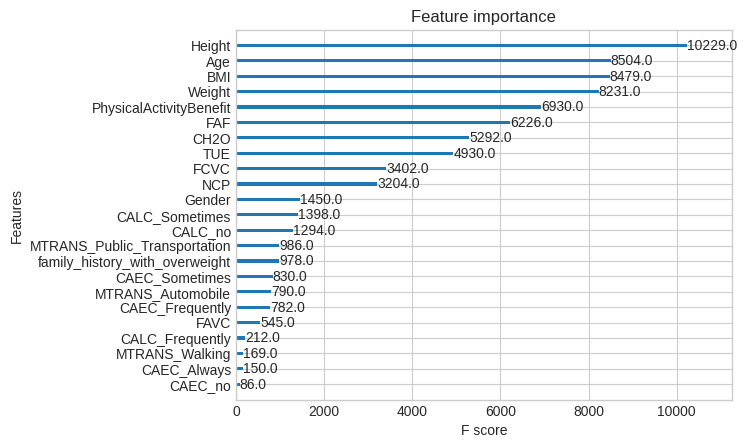

In [ ]:
#Plot feature importance
from xgboost import plot_importance
plot_importance(xgbModel, importance_type='weight')
plt.show()